In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, fsolve

## Calculate Mean and Standard Deviation from a Data Set

In [138]:
data = np.array([12, 13, 15, 19, 20, 21, 24])

n = len(data)
mu = np.sum(data)/n
p = np.empty(len(data))
for i in range(len(data)):
    p[i] = (data[i]-mu)**2    
s = np.sqrt((1/(n-1))*(np.sum(p)))

print('Mean =', mu)
print('Stdev =', s)

Mean = 17.714285714285715
Stdev = 4.46147530585589


## Confidence Intervals
* For student t distributions use z for the t-value from the table
* If you need to calculate the mean and standard deviation yourself use the "data" array with the "mu" and "s" equations behind the "#"s

In [28]:
#Confidence Intervals Stats 201
#for student t distributions use z for the t value from the table
#if you need to calculate the mean and standard deviation yourself use the data array with the mu and s equations behind the #

data = np.array([-.23, .19, .61, -.11, .02, 1.12, .3, .63, .65, .59, .19])
"""-0.23
0.19
0.61
-0.11
0.02
1.12
0.3
0.63
0.65
0.59
0.19
"""
z = 2.05

n = 11
#mu = 4.5
#s = .15*np.sqrt(n)
mu = np.sum(data)/n
p = np.empty(len(data))
for i in range(len(data)):
    p[i] = (data[i]-mu)**2    
s = np.sqrt((1/(n-1))*(np.sum(p)))

def conf(z):
    return z*s/np.sqrt(n)
c = conf(z)
def bounds(c):
    return np.array([mu-c, mu+c])
print('lower bound =', bounds(c)[0])
print('upper bound =', bounds(c)[1])
print('interval =', conf(z))
print('---------------------------------')
#------------------------------------------------
#specify sample size
m = .35

def sampsize(m):
    return (z*s/m)**2

print('sample size =', int(sampsize(m)+.5))


lower bound = 0.11306993997195369
upper bound = 0.6069300600280463
interval = 0.2469300600280463
---------------------------------
sample size = 5


## General code for Z-score and Probability
* Copy and paste - change variable names as needed

For a one-tailed test
---------------------------------
  Z =  3.2998316455372354

  Probability from above:
     P = 0.0005
  Probability from below:
     P = 0.9995

For a two-tailed test
---------------------------------
  Z =  3.2998316455372354

  Probability from above:
     P = 0.001
  Probability from below:
     P = 1.999
---------------------------------



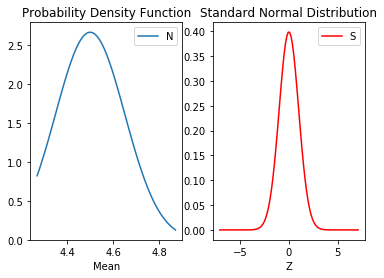

In [31]:
#General code for Zscore and Probability - Copy and paste - Change variable names as needed

mu0 = 4.5
s = .15
n = 50
X = 4.57

def Z(x):
    return (x-mu0)/(s/np.sqrt(n))

#Building a function for pdf and standard normal distribution
a = np.linspace((X-(2*s)), (X+2*s), 100)
b = np.linspace(Z(mu0-s), Z(mu0+s), 100)

def N(x):
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-(x-mu0)**2/(2*s**2))
def S(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

#Probability from above
Pa, erra = quad(S, round(Z(X), 2), 100)
#Probability from below
Pb, errb = quad(S, -100, round(Z(X), 2))

#Print statements----------------------------------------------------

print('For a one-tailed test')
print('---------------------------------')
print('  Z = ', Z(X))
print()
print('  Probability from above:\n     P =', round(Pa, 4))
print('  Probability from below:\n     P =', round(Pb, 4))
print()
print('For a two-tailed test')
print('---------------------------------')
print('  Z = ', Z(X))
print()
print('  Probability from above:\n     P =', 2*round(Pa, 4))
print('  Probability from below:\n     P =', 2*round(Pb, 4))
print('---------------------------------')
print()


#Graphs--------------------------------------------------------------
plt.subplot(1,2,1)
plt.plot(a, N(a))
plt.title('Probability Density Function')
plt.legend('N(a)')
plt.xlabel('Mean')

plt.subplot(1,2,2)
plt.plot(b, S(b), 'r')
plt.title('Standard Normal Distribution')
plt.legend('S(b)')
plt.xlabel('Z');



## Hypothesis Test

* Tools for running hypothesis tests

For a one-tailed test
---------------------------------
  Zts =  3.1139813388842006

  Probability from above:
     P = 0.0009
  Probability from below:
     P = 0.9991

For a two-tailed test
---------------------------------
  Zts =  3.1139813388842006

  Probability from above:
     P = 0.0018
  Probability from below:
     P = 1.9982
---------------------------------



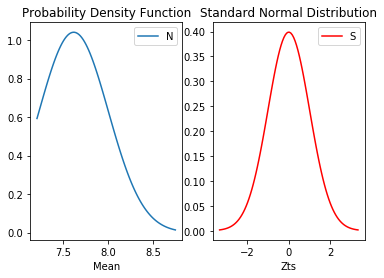

In [29]:
mu0 = 7.618181818
s = 0.383427129
n = 11
X = 7.978181818

def Zts(x):
    return (x-mu0)/(s/np.sqrt(n))

#Building a function for pdf and standard normal distribution
a = np.linspace((X-(2*s)), (X+2*s), 100)
b = np.linspace(Zts(mu0-s), Zts(mu0+s), 100)

def N(x):
    return 1/(s*np.sqrt(2*np.pi))*np.exp(-(x-mu0)**2/(2*s**2))
def S(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

#Probability from above
Pa, erra = quad(S, round(Zts(X), 2), 100)
#Probability from below
Pb, errb = quad(S, -100, round(Zts(X), 2))

print('For a one-tailed test')
print('---------------------------------')
print('  Zts = ', Zts(X))
print()
print('  Probability from above:\n     P =', round(Pa, 4))
print('  Probability from below:\n     P =', round(Pb, 4))
print()
print('For a two-tailed test')
print('---------------------------------')
print('  Zts = ', Zts(X))
print()
print('  Probability from above:\n     P =', 2*round(Pa, 4))
print('  Probability from below:\n     P =', 2*round(Pb, 4))
print('---------------------------------')
print()

plt.subplot(1,2,1)
plt.plot(a, N(a))
plt.title('Probability Density Function')
plt.legend('N(a)')
plt.xlabel('Mean')

plt.subplot(1,2,2)
plt.plot(b, S(b), 'r')
plt.title('Standard Normal Distribution')
plt.legend('S(b)')
plt.xlabel('Zts');

## Finding Z-score given the P-value
* And determining whether the result is statistically significant

In [62]:
#Finding Z-score given the p-value

def S(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

#Enter Z-Score given P
#Pagiven =
Pbgiven = Pagiven = .05
Critical_point = .025     #Level of significance alpha

def ZfromPa(x):
    return quad(S, x, 100)[0] - Pagiven
def ZfromPb(x):
    return quad(S, -100, x)[0] - Pbgiven
def Cpoint(x):
    return quad(S, -100, x)[0] - Critical_point

xguess = 1
Za = fsolve(ZfromPa, xguess)[0]
Zb = fsolve(ZfromPb, xguess)[0]
CP = fsolve(Cpoint, xguess)[0]

if np.abs(Zb)>=np.abs(CP):
    print("Result is statistically significant - Reject null hypothesis H0")
else:
    print("Result is not statistically significant - Fail to reject null hypothesis H0")

print('    |Z-score| =', round(np.abs(Zb), 2))
print('    |Z-critical point| =', round(np.abs(CP), 2))
print('Z-score above =', round(Za, 2))
print('Z-score below =', round(Zb, 2))

Result is not statistically significant - Fail to reject null hypothesis H0
    |Z-score| = 1.64
    |Z-critical point| = 1.96
Z-score above = 1.64
Z-score below = -1.64


## Small Sample Test for $\mu$
* PROBLEM - I don't have a formula for the t-distribution.  It is too complicated.  Just use Excel haha

In [30]:
#d = np.array([93.2, 87, 92.1, 90.1, 87.3, 93.6])
#l = np.empty(len(d))
#for i in range(len(d)):
#    l[i] = (d[i]-X)**2 
#s = np.sqrt((1/(n-1))*(np.sum(l)))

X = 15.01875
mu0 = 14.6125
s = 0.272946881
n = 16
df = n-1
#Enter from Table A.3
alpha = .01
p = .5

def ts(x):
    return (x-mu0)/(s/np.sqrt(n))

h = np.linspace((X-(2*s)), (X+2*s), 100)
f = np.linspace(ts(mu0-s), ts(mu0+s), 100)

if p <= alpha:
    print('Result is statsitically significant - Reject null hypothesis')
else:
    print('Result is not statistically significant - Fail to reject null hypothesis')

print(ts(X))
#plt.plot(h, f)

Result is not statistically significant - Fail to reject null hypothesis
5.953539362847675


In [113]:
l = np.empty(len(d))
for i in range(len(d)):
    l[i] = (d[i]-X)**2  
np.sqrt((1/(n-1))*(np.sum(l)))


(13.2874-16)/1.8389

(13.2874-16)*np.sqrt(11)/((13.2874-16)/1.8389)

(5.92563-6.1)/.07046

-2.474737439682085

## Box and Whisker Plot

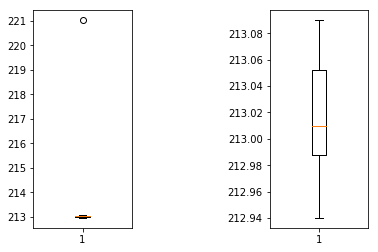

In [145]:
points1 = np.array([213.03, 212.95, 213.04, 213.00, 212.99, 213.01, 221.03, 213.05])
points2 = np.array([213.05, 213.00, 212.94, 213.09, 212.98, 213.02, 213.06, 212.99])
plt.subplot(1,3,1)
plt.boxplot(points1)
plt.subplot(1,3,3)
plt.boxplot(points2);

In [73]:
pay = np.array([149.26/2, 172.97, 56.78, 53.55, 164.94, 163.25, 131.5])
hours = np.array([17.65/2, 20.75, 6.68, 6.3, 19.7, 19.48, 15.47])
print('hours worked =', sum(pay)/8.50)
print(pay/8.50)
print('real hours worked =', sum(hours))

string = 'note to nicholas: do you not like girls like that?'

print(string)
print('I think they are silly')
print('You think all girls are silly including me.....i dont feel special or in other words unique')
print('Reply to Vaitiare: I think they are silly in a different way, like not flattering.  But you are silly in a cute and VERY ATTRACTIVE way :)')

hours worked = 96.19058823529411
[ 8.78       20.34941176  6.68        6.3        19.40470588 19.20588235
 15.47058824]
real hours worked = 97.205
note to nicholas: do you not like girls like that?
I think they are silly
You think all girls are silly including me.....i dont feel special or in other words unique
Reply to Vaitiare: I think they are silly in a different way, like not flattering.  But you are silly in a cute and VERY ATTRACTIVE way :)


205.3 1.3847382424126218 2.0771073636189326
1.3233333333333335 0.4479735111216585


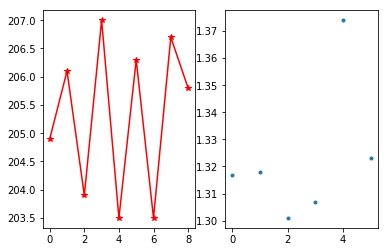

In [7]:
#Graphing some data to compare skewness

data1 = np.array([204.9, 206.1, 203.9, 207.0, 203.5, 206.3, 203.5, 206.7, 205.8])
data2 = np.array([1.317, 1.318, 1.301, 1.307, 1.374, 1.323])
    
plt.subplot(1, 2, 1)
plt.plot(data1, 'r*-')

plt.subplot(1,2,2)
plt.plot(data2, '.')
plt.xlim

mean1 = np.sum(data1)/len(data1)
mean2 = np.sum(data2)/len(data2)

#computing standard deviations--------------
q = np.empty(len(data1))
for i in range(len(data1)):
    q[i] = (data1[i]-mean1)**2
    
r = np.empty(len(data1))
for i in range(len(data2)):
    r[i] = (data2[i]-mean2)**2 
    
stdev1 = np.sqrt((1/((len(data1)-1))*(np.sum(q))))
stdev2 = np.sqrt((1/(len(data2)-1))*(np.sum(r)))
print(mean1, stdev1, 1.5*stdev1)
print(mean2, stdev2)

In [142]:
import statsmodels.api as sm